# Tensorflow - Classification Practice

## Import Libraries

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Import and Clean Data

In [2]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [9]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Continuous Features

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting Continuous to Categorical

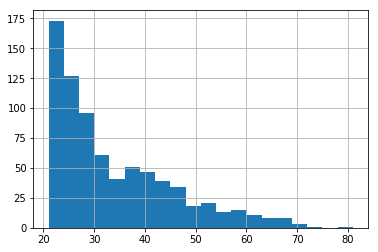

In [14]:
diabetes['Age'].hist(bins=20)

In [15]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

### Putting Them All Together

In [16]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_buckets]

## Train Test Split

In [17]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [19]:
x_data = diabetes.drop("Class", axis=1)

In [20]:
labels = diabetes["Class"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=101)

## Creating the Model

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

### Linear Classifier

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmp5tef9t41', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a247b89b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmp5tef9t41/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 119.154
INFO:tensorflow:loss = 6.3171453, step = 101 (0.840 sec)
INFO:tensorflow:global_step/sec: 456.694
INFO:tensorflow:loss = 5.5337925, step = 201 (0.219 sec)
INFO:tensorflow:global_step/sec: 447.475
INFO:tensorflow:loss = 6.8741026, step = 301 (0.224 sec)
INFO:tensorflow:global_step/sec: 498.811
INFO:tensorflow:loss = 5.660054, step = 401 (0.202 sec)
INFO:tensorflow:global_step/sec: 484.202
INFO:tensorflow:loss = 4.8040495, step = 501 (0.205 sec)
INFO:tensorflow:global_step/sec: 531.935
INFO:tensorflow:loss = 4.462562, step = 601 (0.191 sec)
INFO:tensorflow:

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-25-18:28:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmp5tef9t41/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-25-18:28:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72047246, accuracy_baseline = 0.65748036, auc = 0.7865648, auc_precision_recall = 0.6244041, average_loss = 0.534097, global_step = 1000, label/mean = 0.34251967, loss = 5.217717, prediction/mean = 0.37795058


In [28]:
results

{'accuracy': 0.72047246,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7865648,
 'auc_precision_recall': 0.6244041,
 'average_loss': 0.534097,
 'label/mean': 0.34251967,
 'loss': 5.217717,
 'prediction/mean': 0.37795058,
 'global_step': 1000}

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test, batch_size=10, num_epochs=1, shuffle=False)

In [30]:
predictions = model.predict(pred_input_func)

In [31]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmp5tef9t41/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [32]:
my_pred

[{'logits': array([0.11378896], dtype=float32),
  'logistic': array([0.5284166], dtype=float32),
  'probabilities': array([0.4715834, 0.5284166], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.54429877], dtype=float32),
  'logistic': array([0.63281184], dtype=float32),
  'probabilities': array([0.36718816, 0.63281184], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.44356197], dtype=float32),
  'logistic': array([0.39089254], dtype=float32),
  'probabilities': array([0.60910743, 0.39089254], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.69429684], dtype=float32),
  'logistic': array([0.33307788], dtype=float32),
  'probabilities': array([0.6669221, 0.3330779], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7367384], dtype=float32),
  'logistic': a

### DNN Classifier

In [33]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmp62shbg93', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a24f4cb00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [35]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [36]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_buckets]

In [37]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [39]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpqve4ejn5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a24c5f7b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [40]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpqve4ejn5/model.ckpt.
INFO:tensorflow:loss = 7.0777984, step = 1
INFO:tensorflow:global_step/sec: 276.535
INFO:tensorflow:loss = 7.900798, step = 101 (0.361 sec)
INFO:tensorflow:global_step/sec: 451.311
INFO:tensorflow:loss = 6.6130695, step = 201 (0.222 sec)
INFO:tensorflow:global_step/sec: 549.107
INFO:tensorflow:loss = 5.64797, step = 301 (0.182 sec)
INFO:tensorflow:global_step/sec: 306.944
INFO:tensorflow:loss = 5.5542793, step = 401 (0.326 sec)
INFO:tensorflow:global_step/sec: 474.749
INFO:tensorflow:loss = 5.0420895, step = 501 (0.216 sec)
INFO:tensorflow:global_step/sec: 488.93
INFO:tensorflow:loss = 2.846098, step = 601 (0.201 sec)
INFO:tensorflow:gl

In [41]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, batch_size=10, num_epochs=1, shuffle=False)

In [42]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-04-25-18:41:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jf/g8tp5ct56hl6p6r66zl2knzc0000gn/T/tmpqve4ejn5/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-04-25-18:41:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7362205, accuracy_baseline = 0.65748036, auc = 0.82552135, auc_precision_recall = 0.6847539, average_loss = 0.51304215, global_step = 1000, label/mean = 0.34251967, loss = 5.0120273, prediction/mean = 0.43181312


{'accuracy': 0.7362205,
 'accuracy_baseline': 0.65748036,
 'auc': 0.82552135,
 'auc_precision_recall': 0.6847539,
 'average_loss': 0.51304215,
 'label/mean': 0.34251967,
 'loss': 5.0120273,
 'prediction/mean': 0.43181312,
 'global_step': 1000}